### Analyzing health data from Samsung's devices over a span of 6 years to study sleep patterns

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
samsung_base_dir = os.path.join('..', 'input', 'samsung')

In [3]:
samsung_csv_paths = glob(os.path.join( '*.csv'))
print(len(samsung_csv_paths), 'csvs found')

43 csvs found


In [4]:
from IPython.display import display
sam_readcsv = lambda x: pd.read_csv(x, skiprows=1)
all_csv_df = {os.path.basename(j).replace('com.samsung.', ''): sam_readcsv(j) for j in samsung_csv_paths}
for k, v in all_csv_df.items():
    print(k, 'readings:', v.shape[0])
    display(v.sample(2 if v.shape[0]>2 else 1))

health.device_profile.20230814163053.csv readings: 16


,manufacturer,providing_step_goal,step_source_group,device_type,backsync_step_goal,capability,device_group,update_time,create_time,name,model,connectivity_type,deviceuuid,pkg_name,fixed_name,datauuid
Samsung,NaN,NaN,NaN,NaN,NaN,360001,2022-01-30 10:07:42.428,2022-01-30 10:07:42.428,My Device,SM-N970F,NaN,prylzsMZtN,com.sec.android.app.shealth,Aizaz's Note10,397b83be-e0f5-8b99-7bbd-671baa78ead1,NaN
Combined,NaN,NaN,NaN,NaN,NaN,0,2022-01-30 10:08:04.415,2022-01-30 10:08:04.415,Combined,Combined,NaN,VfS0qUERdZ,com.sec.android.app.shealth,Aizaz's Note10,7af9722c-cd99-07b7-853a-43ce58e819c5,NaN


health.floors_climbed.20230814163053.csv readings: 3194


,start_time,custom,update_time,create_time,floor,time_offset,deviceuuid,pkg_name,end_time,datauuid
2022-09-16 01:53:46.556,NaN,2022-09-16 01:55:27.639,2022-09-16 01:55:27.569,3.0,UTC-0400,63nSCp3rM2,com.sec.android.app.shealth,2022-09-16 01:54:39.559,7303109c-250a-f7fd-c861-0ddd1248f726,NaN
2021-08-03 05:16:49.729,NaN,2021-08-03 05:17:21.663,2021-08-03 05:17:07.736,1.0,UTC+0530,63nSCp3rM2,com.sec.android.app.shealth,2021-08-03 05:17:13.407,4a2e6d56-550e-e489-8df4-e14a9fe995e9,NaN


health.food_info.20230814163053.csv readings: 10


,potassium,vitamin_a,vitamin_c,vitamin_d,cholesterol,description,custom,provider_food_id,metric_serving_amount,sodium,...,info_provider,deviceuuid,metric_serving_unit,saturated_fat,trans_fat,pkg_name,carbohydrate,unit_count_per_calorie,datauuid,default_number_of_serving_unit
233.0,0.0,149.0,0.0,0.0,"32 kcal, Per 100g",NaN,default-fatsecret-35976,152,2.0,3.0,...,mSDHYy75Zj,g,0.023,NaN,com.sec.android.app.shealth,11.67,3.102041,1dd611cf-ad98-428b-8080-21faaef9d82c,1,NaN
170.0,17.0,20.0,0.0,0.0,"30 kcal, Per 100g",NaN,default-fatsecret-35984,152,2.0,0.6,...,mSDHYy75Zj,g,0.024,NaN,com.sec.android.app.shealth,11.48,3.347826,826bd79b-f843-46d4-bf49-ff2006e0c862,1,NaN


health.height.20230814163053.csv readings: 1


,start_time,custom,height,update_time,create_time,time_offset,deviceuuid,pkg_name,datauuid
2022-10-08 19:13:59.558,NaN,176.0,2022-10-08 19:13:59.562,2022-10-08 19:13:59.562,UTC+0530,9wSJ8Y8Ykk,com.sec.android.app.shealth,32421b99-b070-40b2-bba6-475d64d2848c,NaN


health.sleep_stage.20230814163053.csv readings: 20774


,start_time,sleep_id,custom,update_time,create_time,stage,time_offset,deviceuuid,pkg_name,end_time,datauuid
2023-01-14 02:47:00.000,2e179bfd-4456-62c6-5617-427df47e5011,NaN,2023-01-14 07:20:14.660,2023-01-14 07:20:14.660,40002,UTC+0300,mSDHYy75Zj,com.sec.android.app.shealth,2023-01-14 02:51:00.000,9a1c53a3-553d-467c-b8be-25a2cab168f4,NaN
2022-01-06 11:01:00.000,c7380c10-bd27-4d20-6233-6d99e8a27e21,NaN,2022-01-06 11:55:26.152,2022-01-06 11:55:26.152,40002,UTC-0500,fkutc0s9nZ,com.sec.android.app.shealth,2022-01-06 11:04:00.000,8ce9be95-e55d-49c5-a636-ce9a0695bcb8,NaN


health.user_profile.20230814163053.csv readings: 25


,text_value,float_value,update_time,create_time,long_value,key,blob_value,int_value,deviceuuid,pkg_name,double_value,datauuid
NaN,176.0,2022-10-08 19:13:59.562,2022-10-08 19:14:01.761,NaN,height,NaN,NaN,9wSJ8Y8Ykk,com.sec.android.app.shealth,NaN,00000000-0000-0000-0000-000000000008,NaN
M,NaN,2022-10-08 19:13:59.574,2020-01-02 15:06:12.678,NaN,gender,NaN,NaN,9wSJ8Y8Ykk,com.sec.android.app.shealth,NaN,00000000-0000-0000-0000-000000000005,NaN


health.weight.20230814163053.csv readings: 3


,body_fat_mass,start_time,custom,height,weight,muscle_mass,update_time,create_time,skeletal_muscle,fat_free_mass,...,time_offset,deviceuuid,skeletal_muscle_mass,comment,fat_free,pkg_name,body_fat,datauuid,vfa_level,total_body_water
NaN,2021-05-10 14:44:19.474,NaN,NaN,63.7,NaN,2021-05-10 14:44:48.257,2021-05-10 14:44:48.257,NaN,NaN,NaN,...,fkutc0s9nZ,NaN,NaN,NaN,com.sec.android.app.shealth,11.000000,3bd346e3-f072-4c8a-954f-0d60fdf2737e,NaN,NaN,NaN
13.259619,2022-10-08 19:13:59.408,NaN,176.0,68.7,NaN,2022-10-08 19:13:59.414,2022-10-08 19:13:59.414,43.744617,55.440376,1567.0,...,9wSJ8Y8Ykk,30.052551,NaN,80.69924,com.sec.android.app.shealth,19.300756,13a45a3a-df70-4b7b-854a-c4f1a24592db,NaN,40.603,NaN


shealth.activity.day_summary.20230814163053.csv readings: 1812


,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,calorie,extra_data,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time
7861,4969437,NaN,0,2019-03-13 18:30:02.090,2019-03-12 18:30:00.640,60,668896,136,6320.8540,336.46072,c7bd2225-d154-4bae-965e-efd84b63e98a.extra_dat...,IGCDWxFie8,30400,com.sec.android.app.shealth,4939037,19620000,c7bd2225-d154-4bae-965e-efd84b63e98a,1552435200000,NaN
5228,3307824,90.0,0,2022-05-22 03:12:42.532,2022-05-21 04:00:01.522,-1,240000,60,3947.1387,176.89064,a2340029-9e43-433f-8fdc-0d264b836a82.extra_dat...,mSDHYy75Zj,39030,com.sec.android.app.shealth,3268794,17400000,a2340029-9e43-433f-8fdc-0d264b836a82,1653091200000,NaN


shealth.activity.goal.20230814163053.csv readings: 9


,update_time,create_time,value,time_offset,deviceuuid,pkg_name,set_time,datauuid
2019-04-14 19:40:23.013,2019-04-14 19:40:23.013,60,UTC+0530,M7P2zA1piq,com.sec.android.app.shealth,1555270822928,ff5bfeab-b3c4-46c8-bce0-7d88a3ee56c9,NaN
2020-04-26 01:05:59.106,2020-04-26 01:05:59.106,60,UTC+0530,nIwGM/HHjn,com.sec.android.app.shealth,1587863159087,bd010afa-e56d-4f7d-a15e-d7b09d420c99,NaN


shealth.badge.20230814163053.csv readings: 3


,number_of_streak,start_time,exercise_type,device_type,status,sleep_coaching_session_uuid,update_time,create_time,source_pkg_name,key,program_id,is_shown,time_offset,extra_data,deviceuuid,pkg_name,exercise_data_uuid,controller_id,end_time,datauuid
NaN,2023-08-05 04:00:00.000,NaN,100003,1,NaN,2023-08-05 17:11:13.164,2023-08-05 17:11:13.164,com.sec.android.app.shealth,step_milestone_20k_steps,NaN,NaN,UTC-0500,16032.350016,mSDHYy75Zj,com.sec.android.app.shealth,NaN,tracker.pedometer,2023-08-05 04:00:00.000,2b1c29de-336a-4e43-95c2-aedf71ac0345,NaN
NaN,2023-07-25 04:00:00.000,NaN,100003,1,NaN,2023-07-26 01:29:35.707,2023-07-26 01:29:35.707,com.sec.android.app.shealth,step_milestone_10k_steps,NaN,NaN,UTC-0500,7658.879654,mSDHYy75Zj,com.sec.android.app.shealth,NaN,tracker.pedometer,2023-07-25 04:00:00.000,fc8858a1-3cac-4428-9ab6-973aad7002d6,NaN


shealth.best_records.20230814163053.csv readings: 27


,source_id,device_type,update_time,create_time,source_pkg_name,date,type,value,is_shown,extra_type,deviceuuid,pkg_name,controller_id,datauuid
NaN,-100003,2023-08-14 04:00:21.754,2023-08-14 04:00:21.754,NaN,1568937600000,0,23295.0,NaN,-1,VfS0qUERdZ,com.sec.android.app.shealth,tracker.pedometer,00c207da-7106-434d-b963-7e151449fba1,NaN
NaN,-100003,2023-08-14 04:00:21.718,2023-08-14 04:00:21.718,NaN,1533513600000,0,11841.0,NaN,-1,VfS0qUERdZ,com.sec.android.app.shealth,tracker.pedometer,b7ab5b81-2b5f-4ae2-946d-20e531648b8a,NaN


shealth.calories_burned.details.20230814163053.csv readings: 1841


,active_calories_goal,version,extra_data,com.samsung.shealth.calories_burned.tef_calorie,com.samsung.shealth.calories_burned.active_time,com.samsung.shealth.calories_burned.rest_calorie,com.samsung.shealth.calories_burned.update_time,com.samsung.shealth.calories_burned.create_time,com.samsung.shealth.calories_burned.active_calorie,com.samsung.shealth.calories_burned.deviceuuid,com.samsung.shealth.calories_burned.pkg_name,com.samsung.shealth.calories_burned.datauuid,com.samsung.shealth.calories_burned.day_time
NaN,NaN,5cee43ce-e633-4854-a105-9bdec891c4e1.extra_dat...,0.0,802281,1606.2777,2021-12-11 05:00:02.661,2021-12-10 05:00:01.168,43.00000,fkutc0s9nZ,com.sec.android.app.shealth,5cee43ce-e633-4854-a105-9bdec891c4e1,1639094400000,NaN
NaN,NaN,c6e48cea-b83b-4601-ae6f-1fe8e973584f.extra_dat...,0.0,5558883,1649.3569,2020-07-31 17:50:44.777,2020-07-03 18:30:01.579,364.93994,nIwGM/HHjn,com.sec.android.app.shealth,c6e48cea-b83b-4601-ae6f-1fe8e973584f,1593820800000,NaN


shealth.daily_activity.goal.20230814163053.csv readings: 1


,update_time,create_time,type,value,time_offset,deviceuuid,pkg_name,set_time,datauuid
2022-10-01 05:47:52.067,2022-10-01 05:47:52.067,5,500,UTC+0530,63nSCp3rM2,com.sec.android.app.shealth,1664603272067,4a25177f-5633-5df9-482b-1d08ab42ccb8,NaN


shealth.exercise.20230814163053.csv readings: 1217


,live_data_internal,mission_value,subset_data,routine_datauuid,total_calorie,completion_status,pace_info_id,activity_type,pace_live_data,sensing_status,...,com.samsung.health.exercise.live_data,com.samsung.health.exercise.mean_power,com.samsung.health.exercise.mean_speed,com.samsung.health.exercise.pkg_name,com.samsung.health.exercise.altitude_gain,com.samsung.health.exercise.altitude_loss,com.samsung.health.exercise.exercise_custom_type,com.samsung.health.exercise.end_time,com.samsung.health.exercise.datauuid,com.samsung.health.exercise.sweat_loss
NaN,0.0,NaN,NaN,127.394,0.0,NaN,NaN,NaN,NaN,4,...,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,NaN,2018-09-08 03:44:00.008,1041ea38-605b-9795-e302-c2ed57eb3930,NaN,NaN
NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,...,NaN,1.386209,com.sec.android.app.shealth,NaN,NaN,NaN,2023-06-21 17:00:00.000,8e5412a2-1f18-47a6-86e8-452ab6d3fb13,NaN,NaN


shealth.exercise.recovery_heart_rate.20230814163053.csv readings: 2


,start_time,update_time,create_time,time_offset,deviceuuid,exercise_id,pkg_name,end_time,datauuid,heart_rate
2022-07-11 22:04:34.421,2022-07-11 22:06:34.536,2022-07-11 22:06:34.536,UTC-0400,xBiM8VBYgX,dbd809bb-1f3c-4b10-8887-c8e23d87487d,com.sec.android.app.shealth,2022-07-11 22:06:34.421,754a336e-7f03-4ff7-9862-f901ee09f825,754a336e-7f03-4ff7-9862-f901ee09f825.heart_rat...,NaN


shealth.exercise.weather.20230814163053.csv readings: 47


,uv_index,sunset_time,start_time,latitude,custom,wind_direction,phrase,sundown_time,temperature_scale,content_provider,...,humidity,time_offset,deviceuuid,exercise_id,pkg_name,wind_speed_unit,forecast_time,wind_speed,icon_info_id,datauuid
0.0,NaN,2020-08-04 17:12:31.648,17.626066,NaN,NaN,Cloudy,NaN,1,TWC,2020-08-04 17:35:30.398,...,UTC+0530,eMXw7I/7TD,c278375d-8281-956e-fd06-33685b388db1,com.sec.android.app.shealth,NaN,NaN,NaN,3,81d674a0-872c-762a-1d14-ae8b305f09dd,NaN
1.0,NaN,2019-03-16 12:05:29.650,17.422636,NaN,ESE,Sunny,NaN,1,Accuweather,2019-03-16 12:19:34.190,...,UTC+0530,eMXw7I/7TD,f7681e0a-4b85-0e11-a646-af26dc9ef1d5,com.sec.android.app.shealth,km/h,NaN,7.0,1,00964dae-7e91-f714-0b97-e453d56c2d01,NaN


shealth.food_frequent.20230814163053.csv readings: 10


,eveningsnack_count,update_time,create_time,morningsnack_count,dinner_count,breakfast_count,deviceuuid,pkg_name,afternoonsnack_count,datauuid,food_info_id,lunch_count
0.83,2022-02-27 19:06:33.643,2022-02-27 19:06:33.643,0.83,0.83,0.83,mSDHYy75Zj,com.sec.android.app.shealth,0.83,e6d6e062-5ef1-438e-9f53-2230f22b6658,689dbe3a-3acb-4356-813c-175da13df14c,0.83,NaN
0.67,2022-02-27 19:06:33.644,2022-02-27 19:06:33.644,0.67,0.67,0.67,mSDHYy75Zj,com.sec.android.app.shealth,0.67,3fcc75c6-5281-406b-b8d9-e80700665d9c,31b40e87-3b4f-43d8-a90c-5cd6cbcc5043,0.67,NaN


shealth.goal_history.20230814163053.csv readings: 9


,update_time,create_time,type,time_offset,deviceuuid,pkg_name,set_time,controller_id,datauuid
2021-03-13 11:16:34.621,2021-03-13 11:16:34.621,1,UTC+0530,fkutc0s9nZ,com.sec.android.app.shealth,1615634193608,goal.activity,d794a32a-c136-49a7-a0d2-0d027fcd3076,NaN
2019-10-03 06:02:19.317,2019-10-03 06:02:19.317,1,UTC+0530,nIwGM/HHjn,com.sec.android.app.shealth,1570082516431,goal.activity,49f77957-3d4c-4895-83d3-84ef9d937bf6,NaN


shealth.permission.20230814163053.csv readings: 5


,client_id,allowed,update_time,create_time,item,requester,deviceuuid,pkg_name,operation,permitted_on,datauuid,optionals
com.sec.android.app.shealth,1,2022-01-30 10:08:07.289,2022-01-30 10:07:42.242,data,NaN,prylzsMZtN,com.sec.android.app.shealth,sync,1,397b83be-e0f5-8b99-7bbd-671baa78ead1,NaN,NaN
com.sec.android.app.shealth,1,2019-10-03 06:02:00.850,2019-10-03 06:02:00.850,data,NaN,nIwGM/HHjn,com.sec.android.app.shealth,sync,1,b6fb9ce1-620f-b796-7f22-9fa91613f040,b6fb9ce1-620f-b796-7f22-9fa91613f040.optionals...,NaN


shealth.preferences.20230814163053.csv readings: 25


,text_value,service_id,float_value,update_time,create_time,long_value,tag,blob_value,int_value,deviceuuid,pkg_name,double_value,datauuid
NaN,tracker.exercise,NaN,2022-02-25 03:06:48.636,2022-01-30 10:08:08.045,NaN,NaN,34-workout_list.blob_value.json,NaN,mSDHYy75Zj,com.sec.android.app.shealth,NaN,34-workout_list,NaN
NaN,tracker.heartrate,NaN,2022-05-12 16:06:15.155,2022-04-29 00:34:47.748,NaN,NaN,NaN,40.0,xBiM8VBYgX,com.sec.android.app.shealth,NaN,05-alert.low.limit,NaN


shealth.program.sleep_coaching.mission.20230814163053.csv readings: 120


,answer,priority,update_time,create_time,data_version,day_index,mission_id,deviceuuid,pkg_name,is_key_habit,session_id,datauuid,is_done
NaN,NaN,2022-10-29 04:40:46.049,2022-10-29 04:40:46.049,1,16,SP_MSN_07,mSDHYy75Zj,com.sec.android.app.shealth,NaN,b8237bdb-0b77-4c2d-a48b-ccb9bc682cdd,efde2d67-a10e-4866-8542-077df35e4f61,0,NaN
NaN,NaN,2022-10-29 04:40:46.048,2022-10-29 04:40:46.048,1,9,SP_MSN_04,mSDHYy75Zj,com.sec.android.app.shealth,NaN,b8237bdb-0b77-4c2d-a48b-ccb9bc682cdd,db8887eb-3b09-41a6-9504-ca71feb65b8a,0,NaN


shealth.program.sleep_coaching.session.20230814163053.csv readings: 1


,mission_count,is_report_read,start_date,survey,update_time,create_time,data_version,type,deviceuuid,contents_version,pkg_name,end_date,datauuid
120,0,1667001600000,NaN,2022-10-29 04:40:46.081,2022-10-29 04:40:46.081,2,8,mSDHYy75Zj,2,com.sec.android.app.shealth,1669939200000,b8237bdb-0b77-4c2d-a48b-ccb9bc682cdd,NaN


shealth.report.20230814163053.csv readings: 205


,timezone,start_date,update_time,create_time,type,is_empty,version,deviceuuid,content,pkg_name,datauuid,compressed_content
Asia/Kolkata,1573324200000,2019-11-17 08:48:58.021,2019-11-17 08:48:54.538,0,0,2,nIwGM/HHjn,X,com.sec.android.app.shealth,71980189-9f87-483d-84b7-e32ec64ca273,71980189-9f87-483d-84b7-e32ec64ca273.compresse...,NaN
Asia/Kolkata,1576953000000,2019-12-29 08:49:02.151,2019-12-29 08:48:54.785,0,0,2,nIwGM/HHjn,X,com.sec.android.app.shealth,3594cb11-95e7-460d-8861-becefa636a47,3594cb11-95e7-460d-8861-becefa636a47.compresse...,NaN


shealth.rewards.20230814163053.csv readings: 2246


,number_of_streak,start_time,exercise_type,device_type,exercise_session_id,update_time,create_time,source_pkg_name,program_id,title,time_offset,extra_data,deviceuuid,pkg_name,controller_id,end_time,datauuid,is_visible
NaN,2019-11-18 05:00:00.000,NaN,100003.0,NaN,2023-08-05 16:05:56.759,2023-08-05 16:05:56.759,NaN,NaN,tracker_pedometer_reward_target_achieved,UTC-0500,"{""mTarget"":6000,""mValue"":8638}",mSDHYy75Zj,com.sec.android.app.shealth,tracker.pedometer,2019-11-18 05:00:00.000,925e1d83-a2e4-4c9c-bab5-bb7f154b1b17,1,NaN
NaN,2020-02-07 14:55:03.483,NaN,NaN,NaN,2020-02-08 16:03:51.114,2020-02-07 14:55:03.566,NaN,NaN,goal_activity_reward_goal_achieved,UTC+0530,"{""mIsCompleted"":true,""mValue"":90,""mValue2"":60}",nIwGM/HHjn,com.sec.android.app.shealth,goal.activity,2020-02-07 14:55:03.483,a8669ca1-5ec1-49b8-8fee-bc8cb08c18cb,0,NaN


shealth.sleep.20230814163053.csv readings: 1833


,original_efficiency,mental_recovery,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,...,com.samsung.health.sleep.start_time,com.samsung.health.sleep.custom,com.samsung.health.sleep.update_time,com.samsung.health.sleep.create_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.deviceuuid,com.samsung.health.sleep.comment,com.samsung.health.sleep.pkg_name,com.samsung.health.sleep.end_time,com.samsung.health.sleep.datauuid
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-11-28 03:15:02.488,2019-11-28 03:15:02.488,UTC+0530,eMXw7I/7TD,NaN,com.sec.android.app.shealth,2019-11-28 02:40:00.000,2c03da13-4e72-9327-084d-6bdfff325d33,NaN
NaN,66.0,22.0,22.0,2.0,9.0,26.0,240.0,64.0,1.0,13.0,...,NaN,2021-05-18 00:30:11.638,2021-05-18 00:30:08.408,UTC+0530,63nSCp3rM2,NaN,com.sec.android.app.shealth,2021-05-18 00:23:00.000,a088d084-0328-2f75-1804-a437887d6928,NaN


shealth.sleep_combined.20230814163053.csv readings: 83


,original_efficiency,start_time,mental_recovery,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,...,time_offset,extra_data,deviceuuid,sleep_cycle,efficiency,sleep_score,pkg_name,sleep_duration,end_time,datauuid
NaN,2021-10-22 04:47:00.000,71.0,14,14,9,4,50,434,178,1,...,NaN,63nSCp3rM2,3,87.0,61,com.sec.android.app.shealth,439,2021-10-22 12:26:00.000,72ed8e0e-36f0-46d4-800d-6cd74b1dbbdb,NaN
NaN,2022-04-30 04:31:00.000,80.0,0,46,3,0,12,266,58,0,...,NaN,LZLpUCW//c,2,95.0,65,com.sec.android.app.shealth,266,2022-04-30 09:50:00.000,0996ca71-d60a-4700-90cd-19104e3e2e4b,NaN


shealth.sleep_data.20230814163053.csv readings: 1050


,start_time,update_time,create_time,sleep_uuid,sleep_status,time_offset,deviceuuid,comment,pkg_name,json_version,datauuid
2015-01-01 19:30:00.000,2015-01-01 21:22:55.680,2015-01-01 21:22:55.680,daf6aa81-9ee8-769a-af15-8b354717b6b4,78187688-c645-9c92-95e5-a0ead1d28299.sleep_sta...,UTC+0530,eMXw7I/7TD,NaN,com.sec.android.app.shealth,1,78187688-c645-9c92-95e5-a0ead1d28299,NaN
2020-10-22 19:22:00.000,2020-10-23 02:36:03.961,2020-10-23 02:36:03.961,9eb6ffc8-1556-c1a1-a770-dfd4322bc7a3,6515d2a6-8015-a53c-7782-1a105a8c43b2.sleep_sta...,UTC+0530,eMXw7I/7TD,NaN,com.sec.android.app.shealth,1,6515d2a6-8015-a53c-7782-1a105a8c43b2,NaN


shealth.sleep_goal.20230814163053.csv readings: 2


,update_time,create_time,sleep_time,wake_up_time,deviceuuid,pkg_name,bed_time,set_time,datauuid
2022-10-29 04:40:20.399,2022-10-29 04:40:20.399,-57600000,25200000,mSDHYy75Zj,com.sec.android.app.shealth,82800000,1667018420359,3b8d1d01-545c-44eb-9f61-894c5c7b0eca,NaN


shealth.social.leaderboard.20230814163053.csv readings: 3


,update_time,create_time,my_value,body,type,deviceuuid,pkg_name,last_sync_time,datauuid
2022-01-30 10:08:34.819,2022-01-30 10:08:34.819,100,67ca3c7c-b699-4c3d-a509-f6ad95f883fc.body.json,101,prylzsMZtN,com.sec.android.app.shealth,1643537314773,67ca3c7c-b699-4c3d-a509-f6ad95f883fc,NaN
2022-01-30 10:08:34.793,2022-01-30 10:08:34.793,100,afad5d34-f5a1-4b52-aed8-95f57814b4a3.body.json,102,prylzsMZtN,com.sec.android.app.shealth,1643537314772,afad5d34-f5a1-4b52-aed8-95f57814b4a3,NaN


shealth.social.public_challenge.20230814163053.csv readings: 1


,update_time,create_time,body,deviceuuid,pkg_name,last_sync_time,datauuid
2022-01-30 10:08:34.519,2022-01-30 10:08:34.519,a68df191-2e4b-4494-b621-8e850893c618.body.json,prylzsMZtN,com.sec.android.app.shealth,1643537314434,a68df191-2e4b-4494-b621-8e850893c618,NaN


shealth.social.public_challenge.extra.20230814163053.csv readings: 1


,update_time,create_time,type,value,deviceuuid,pkg_name,datauuid
2022-01-30 10:08:09.906,2022-01-30 10:08:09.906,2,"{""uiViewStatusItemList"":[]}",prylzsMZtN,com.sec.android.app.shealth,9c95beea-556d-4402-a734-84de8dcaee99,NaN


shealth.social.public_challenge.history.20230814163053.csv readings: 1


,update_time,create_time,body,challenge_time,deviceuuid,pkg_name,last_sync_time,datauuid
2022-01-30 10:08:34.934,2022-01-30 10:08:34.934,ef618d4c-f590-4f70-8ca3-c613a4c59208.body.json,SIMPLE_LEVEL,prylzsMZtN,com.sec.android.app.shealth,1643537314920,ef618d4c-f590-4f70-8ca3-c613a4c59208,NaN


shealth.social.service_status.20230814163053.csv readings: 3


,status,update_time,create_time,service_type,deviceuuid,pkg_name,datauuid
100,2022-03-15 05:51:21.104,2022-01-30 10:08:07.318,3,mSDHYy75Zj,com.sec.android.app.shealth,a064a29a-08e4-4148-af98-5ff0443780d0,NaN
1,2022-01-30 10:08:34.938,2022-01-30 10:08:07.318,2,prylzsMZtN,com.sec.android.app.shealth,43d4286c-cf65-421d-9898-883e8a657c90,NaN


shealth.stand_day_summary.20230814163053.csv readings: 523


,stand_time,update_time,create_time,deviceuuid,pkg_name,datauuid,day_time
163840,2022-03-18 21:23:31.254,2022-03-18 04:00:04.637,63nSCp3rM2,com.sec.android.app.shealth,841a675f-c101-9d88-cbc9-ea66179f8486,1647561600000,NaN
8389889,2021-04-25 17:59:33.291,2021-04-24 18:30:21.920,63nSCp3rM2,com.sec.android.app.shealth,43306391-9ee2-8375-610c-550862fa27e2,1619308800000,NaN


shealth.step_daily_trend.20230814163053.csv readings: 4847


,binning_data,update_time,create_time,source_pkg_name,source_type,count,speed,distance,calorie,deviceuuid,pkg_name,datauuid,day_time
e5f3a3ee-837f-4f99-989a-a6de755000ba.binning_data.json,2022-01-30 10:09:36.217,2022-01-30 10:09:36.217,com.sec.android.app.shealth,0,3113,1.273390,2325.060,101.34999,prylzsMZtN,com.sec.android.app.shealth,e5f3a3ee-837f-4f99-989a-a6de755000ba,1642464000000,NaN
e548ff06-bf11-49ce-a7a3-40dd5e9919da.binning_data.json,2022-01-30 10:09:46.481,2022-01-30 10:09:46.481,com.sec.android.app.shealth,-2,4689,1.319236,3507.321,158.39000,VfS0qUERdZ,com.sec.android.app.shealth,e548ff06-bf11-49ce-a7a3-40dd5e9919da,1625184000000,NaN


shealth.stress.20230814163053.csv readings: 9


,start_time,custom,binning_data,tag_id,update_time,create_time,max,min,score,algorithm,time_offset,deviceuuid,comment,pkg_name,end_time,datauuid
2022-10-01 09:42:39.789,NaN,NaN,10000,2022-10-01 09:42:39.789,2022-10-01 09:42:39.789,0.0,0.0,0.0,1.0,UTC+0530,63nSCp3rM2,NaN,com.sec.android.app.shealth,2022-10-01 09:42:39.789,b1ec5a2d-f040-a796-4c45-0fc529f3e341,NaN
2021-08-13 08:16:39.360,NaN,NaN,10000,2021-08-13 08:16:39.360,2021-08-13 08:16:39.360,100.0,100.0,100.0,1.0,UTC+0530,63nSCp3rM2,NaN,com.sec.android.app.shealth,2021-08-13 08:16:39.360,5f02da38-c6cb-8979-9cdd-5e11965b126f,NaN


shealth.stress.base_histogram.20230814163053.csv readings: 1


,update_time,create_time,deviceuuid,pkg_name,histogram,datauuid
2018-08-25 13:30:26.835,2018-08-25 13:30:26.835,sIZN3KFua8,com.sec.android.app.shealth,87a0254a-d87d-442c-8864-a15b9d508961.histogram...,87a0254a-d87d-442c-8864-a15b9d508961,NaN


shealth.stress.histogram.20230814163053.csv readings: 4


,update_time,create_time,base_hr,decay_time,deviceuuid,pkg_name,histogram,datauuid
2022-10-01 09:42:39.716,2022-10-01 09:42:39.716,82560,1664617359,63nSCp3rM2,com.sec.android.app.shealth,48de45d6-6230-7d9b-11de-b0cf1833a5cf.histogram...,48de45d6-6230-7d9b-11de-b0cf1833a5cf,NaN
2022-07-17 02:08:22.092,2022-06-15 17:32:18.139,87746,1658023702,xBiM8VBYgX,com.sec.android.app.shealth,8a144e87-a76c-4d88-a21d-22bc497fbfb8.histogram...,8a144e87-a76c-4d88-a21d-22bc497fbfb8,NaN


shealth.tracker.heart_rate.20230814163053.csv readings: 22850


,source,tag_id,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.create_time,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
NaN,21312,1,2021-04-08 22:50:50.852,NaN,NaN,2021-04-08 22:55:00.299,2021-04-08 22:55:00.299,0.0,0.0,UTC+0530,63nSCp3rM2,NaN,com.sec.android.app.shealth,2021-04-08 22:50:50.852,375a7e72-9ccd-0b43-3943-09c56d6f5a7c,61.0,NaN
NaN,21312,1,2021-11-30 00:30:58.467,NaN,NaN,2021-11-30 00:34:59.346,2021-11-30 00:14:59.361,0.0,0.0,UTC-0500,63nSCp3rM2,NaN,com.sec.android.app.shealth,2021-11-30 00:30:58.467,2df12407-1984-9c18-0b39-c4275150bceb,83.0,NaN


shealth.tracker.oxygen_saturation.20230814163053.csv readings: 1


,source,tag_id,com.samsung.health.oxygen_saturation.start_time,com.samsung.health.oxygen_saturation.custom,com.samsung.health.oxygen_saturation.update_time,com.samsung.health.oxygen_saturation.create_time,com.samsung.health.oxygen_saturation.low_duration,com.samsung.health.oxygen_saturation.binning,com.samsung.health.oxygen_saturation.max,com.samsung.health.oxygen_saturation.min,com.samsung.health.oxygen_saturation.spo2,com.samsung.health.oxygen_saturation.time_offset,com.samsung.health.oxygen_saturation.deviceuuid,com.samsung.health.oxygen_saturation.comment,com.samsung.health.oxygen_saturation.pkg_name,com.samsung.health.oxygen_saturation.end_time,com.samsung.health.oxygen_saturation.datauuid,com.samsung.health.oxygen_saturation.heart_rate
NaN,30000,2018-08-25 13:29:13.121,NaN,2018-08-25 13:29:26.265,2018-08-25 13:29:26.265,NaN,NaN,NaN,NaN,99.0,UTC+0530,sIZN3KFua8,NaN,com.sec.android.app.shealth,2018-08-25 13:29:16.088,fd118acc-537a-4955-9f9a-d6ff858571ae,81.0,NaN


shealth.tracker.pedometer_day_summary.20230814163053.csv readings: 4848


,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time
10166,178deff5-6e1b-4d99-a305-29a99ab2d21c.binning_d...,5346007,10000,189,2018-11-09 06:03:27.175,com.sec.android.app.shealth,2018-11-06 02:17:27.853,178deff5-6e1b-4d99-a305-29a99ab2d21c.source_in...,1.391543,7439.1997,368.45898,9977,VfS0qUERdZ,com.sec.android.app.shealth,0,178deff5-6e1b-4d99-a305-29a99ab2d21c.achieveme...,178deff5-6e1b-4d99-a305-29a99ab2d21c,1541462400000,NaN
1417,c98f1c67-5a94-44a8-b7d9-54e39a596580.binning_d...,802883,10000,0,2022-04-13 04:00:14.091,com.sec.android.app.shealth,2022-04-13 04:00:14.091,NaN,1.317364,1057.6900,46.87999,1417,mSDHYy75Zj,com.sec.android.app.shealth,0,c98f1c67-5a94-44a8-b7d9-54e39a596580.achieveme...,c98f1c67-5a94-44a8-b7d9-54e39a596580,1649721600000,NaN


shealth.tracker.pedometer_recommendation.20230814163053.csv readings: 2


,update_time,create_time,value,time_offset,deviceuuid,pkg_name,set_time,datauuid
2022-02-25 03:06:52.635,2022-02-25 03:06:52.635,10000,UTC-0500,Mk66SbFqK1,com.sec.android.app.shealth,1643252812536,a495e25d-6d27-4aae-9f7f-39df73c07e54,NaN


shealth.tracker.pedometer_step_count.20230814163053.csv readings: 3615


,duration,version_code,run_step,walk_step,com.samsung.health.step_count.start_time,com.samsung.health.step_count.sample_position_type,com.samsung.health.step_count.custom,com.samsung.health.step_count.update_time,com.samsung.health.step_count.create_time,com.samsung.health.step_count.count,com.samsung.health.step_count.speed,com.samsung.health.step_count.distance,com.samsung.health.step_count.calorie,com.samsung.health.step_count.time_offset,com.samsung.health.step_count.deviceuuid,com.samsung.health.step_count.pkg_name,com.samsung.health.step_count.end_time,com.samsung.health.step_count.datauuid
7171,4,0,13,2023-08-01 03:09:00.000,NaN,NaN,2023-08-01 03:11:28.386,2023-08-01 03:11:28.386,13,1.416667,10.16,0.49,UTC-0400,mSDHYy75Zj,com.sec.android.app.shealth,2023-08-01 03:10:00.000,1c70888d-2191-4391-8551-951bd726eee7,NaN
4557,4,0,8,2023-08-14 13:38:00.000,NaN,NaN,2023-08-14 13:39:25.200,2023-08-14 13:39:25.200,8,1.305556,5.95,0.26,UTC-0400,mSDHYy75Zj,com.sec.android.app.shealth,2023-08-14 13:39:00.000,ae4b6d4d-720a-431b-ab48-774eb99bd078,NaN


In [11]:
sleep=pd.read_csv("sleep.csv")
sleep.head(5)

,Date,has_sleep_data,efficiency,sleep_score,sleep_duration,start_time,start_time_epoch,update_time,update_time_epoch,create_time,create_time_epoch,time_offset,end_time,end_time_epoch,total_sleep
0,8/4/2018,1,88.42315,NaN,NaN,8/4/2018 19:43,1533411780,8/5/2018 4:18,1533442684,8/5/2018 4:18,1533442684,UTC+0300,8/5/2018 4:03,1533441780,8:20:00
1,8/5/2018,1,90.50279,NaN,NaN,8/5/2018 20:31,1533501060,8/5/2018 23:43,1533512622,8/5/2018 23:43,1533512622,UTC+0300,8/5/2018 23:29,1533511740,2:58:00
2,8/6/2018,1,78.46154,NaN,NaN,8/6/2018 12:26,1533558360,8/6/2018 13:44,1533563071,8/6/2018 13:44,1533563071,UTC+0300,8/6/2018 13:30,1533562200,1:04:00
3,8/6/2018,1,93.52518,NaN,NaN,8/6/2018 21:31,1533591060,8/7/2018 2:22,1533608566,8/7/2018 2:22,1533608566,UTC+0300,8/7/2018 2:08,1533607680,4:37:00
4,8/7/2018,1,86.59004,NaN,NaN,8/7/2018 19:28,1533670080,8/8/2018 0:02,1533686555,8/8/2018 0:02,1533686555,UTC+0300,8/7/2018 23:48,1533685680,4:20:00


In [21]:
#Convert 'date' from string to Datetime format
sleep['date'] = pd.to_datetime(sleep['date'], format='%m/%d/%Y')

In [22]:
#Convert 'total_sleep' from string to time format
sleep['total_sleep'] = pd.to_timedelta(sleep['total_sleep'])

In [41]:
# Assuming 'total_sleep' column is in hours (float) format
sleep['hours'] = sleep['total_sleep'].astype(int)  # Extract hours
sleep['minutes'] = (sleep['total_sleep'] - sleep['hours']) * 60  # Extract minutes

# Ensure 'hours' and 'minutes' are in integer format
sleep['hours'] = sleep['hours'].astype(int)
sleep['minutes'] = sleep['minutes'].astype(int)


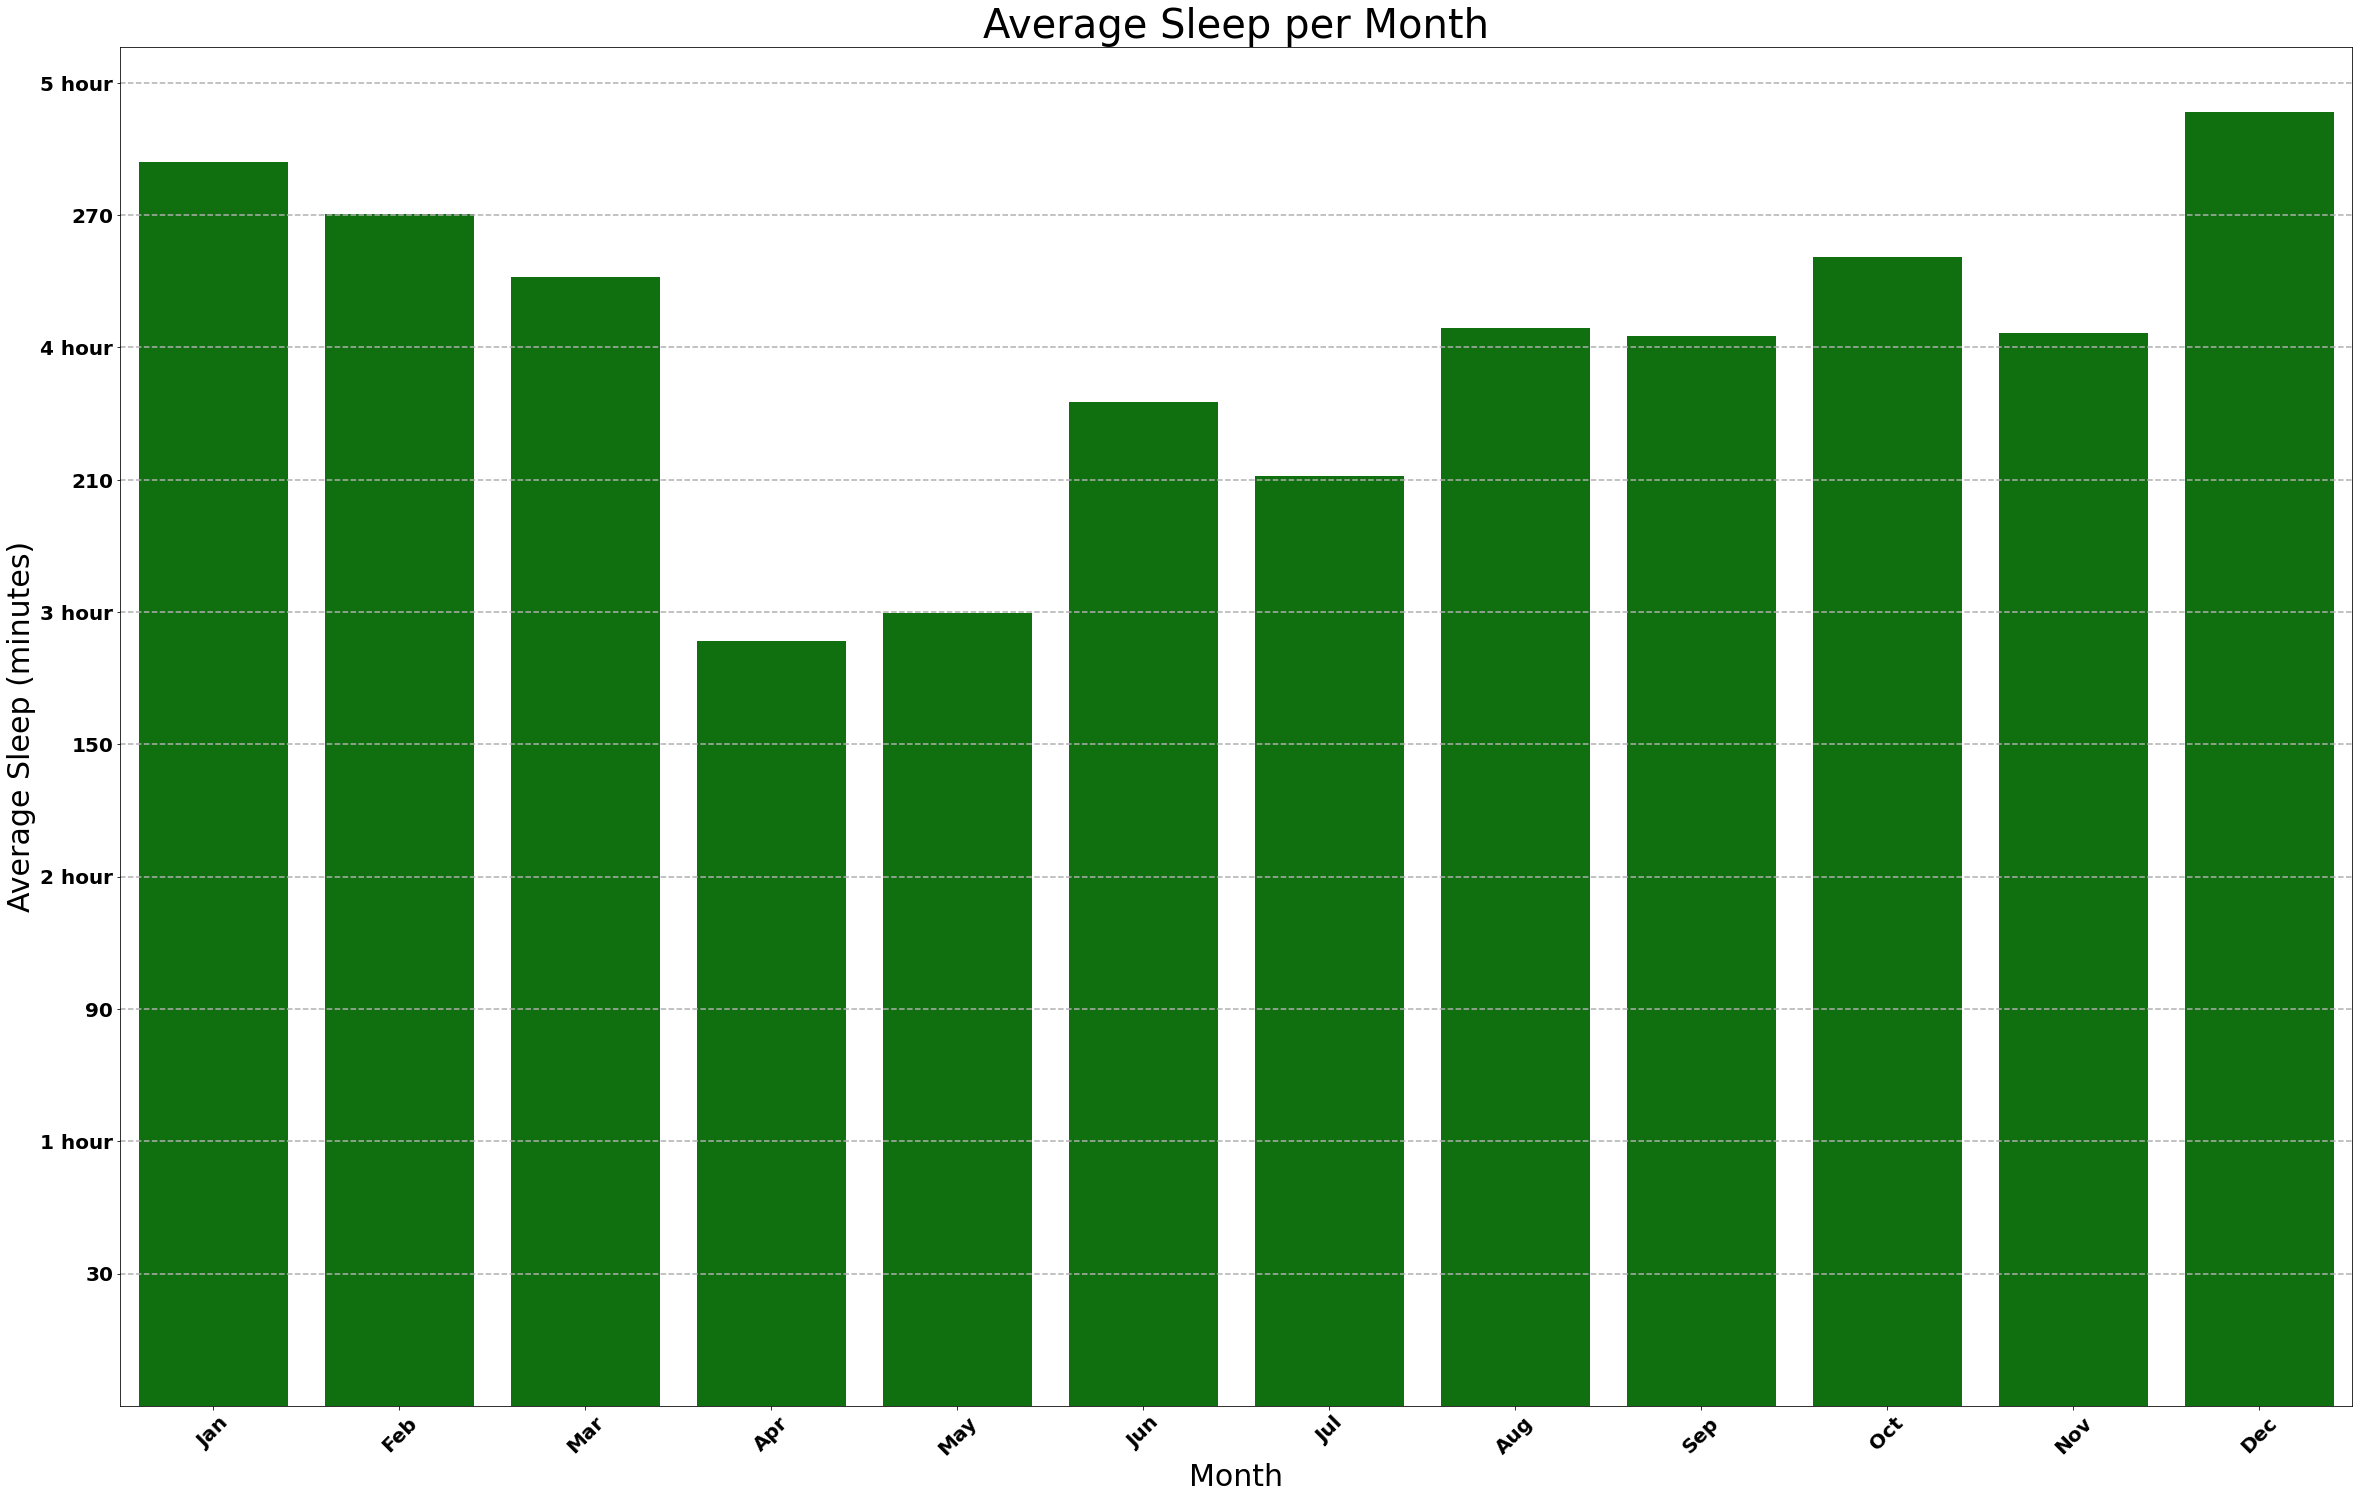

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'date' column is in datetime format
sleep['Month'] = sleep['date'].dt.to_period('M')

# Calculate total sleep time in minutes
sleep['total_sleep_minutes'] = sleep['hours'] * 60 + sleep['minutes']

# Calculate average sleep per month
average_sleep_per_month = sleep.groupby('Month')['total_sleep_minutes'].mean().reset_index()

# Grouping by month across all years
monthly_average_sleep = average_sleep_per_month.groupby(average_sleep_per_month['Month'].dt.month)['total_sleep_minutes'].mean().reset_index()

# Define a custom colormap ranging from light grey to black based on average sleep duration
min_avg = monthly_average_sleep['total_sleep_minutes'].min()
max_avg = monthly_average_sleep['total_sleep_minutes'].max()

cmap = mcolors.LinearSegmentedColormap.from_list("CustomMap", [(0, 'lightgrey'), (1, 'black')])

# Normalize average sleep durations to range between 0 and 1 for colormap usage
normalized = (monthly_average_sleep['total_sleep_minutes'] - min_avg) / (max_avg - min_avg)

# Plotting with Seaborn using the custom colormap
plt.figure(figsize=(40, 25))  # Maintain the larger figure size
ax = sns.barplot(x='Month', y='total_sleep_minutes', data=monthly_average_sleep, color='green')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Adjust font sizes for better readability
plt.title('Average Sleep per Month', fontsize=40)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Average Sleep (minutes)', fontsize=30)

# Change month numbers to month names in x-axis labels
ax.set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)], fontsize=20, fontweight='bold')

# Set y-axis ticks starting from 30 minutes with bold font, skipping 0 hour
ticks = range(30, int(monthly_average_sleep['total_sleep_minutes'].max()) + 30, 30)
tick_labels = [f'{i // 60} hour' if i % 60 == 0 else i for i in ticks]
plt.yticks(ticks, tick_labels, fontsize=20, fontweight='bold')

# Customize grid lines (dashed lines)
plt.grid(axis='y', linestyle='--', linewidth=1.5)

# Save the plot as an image
plt.savefig('average_sleep_per_month_large_green.png', dpi=300)  # Maintain the higher DPI

# Show the plot
plt.show()


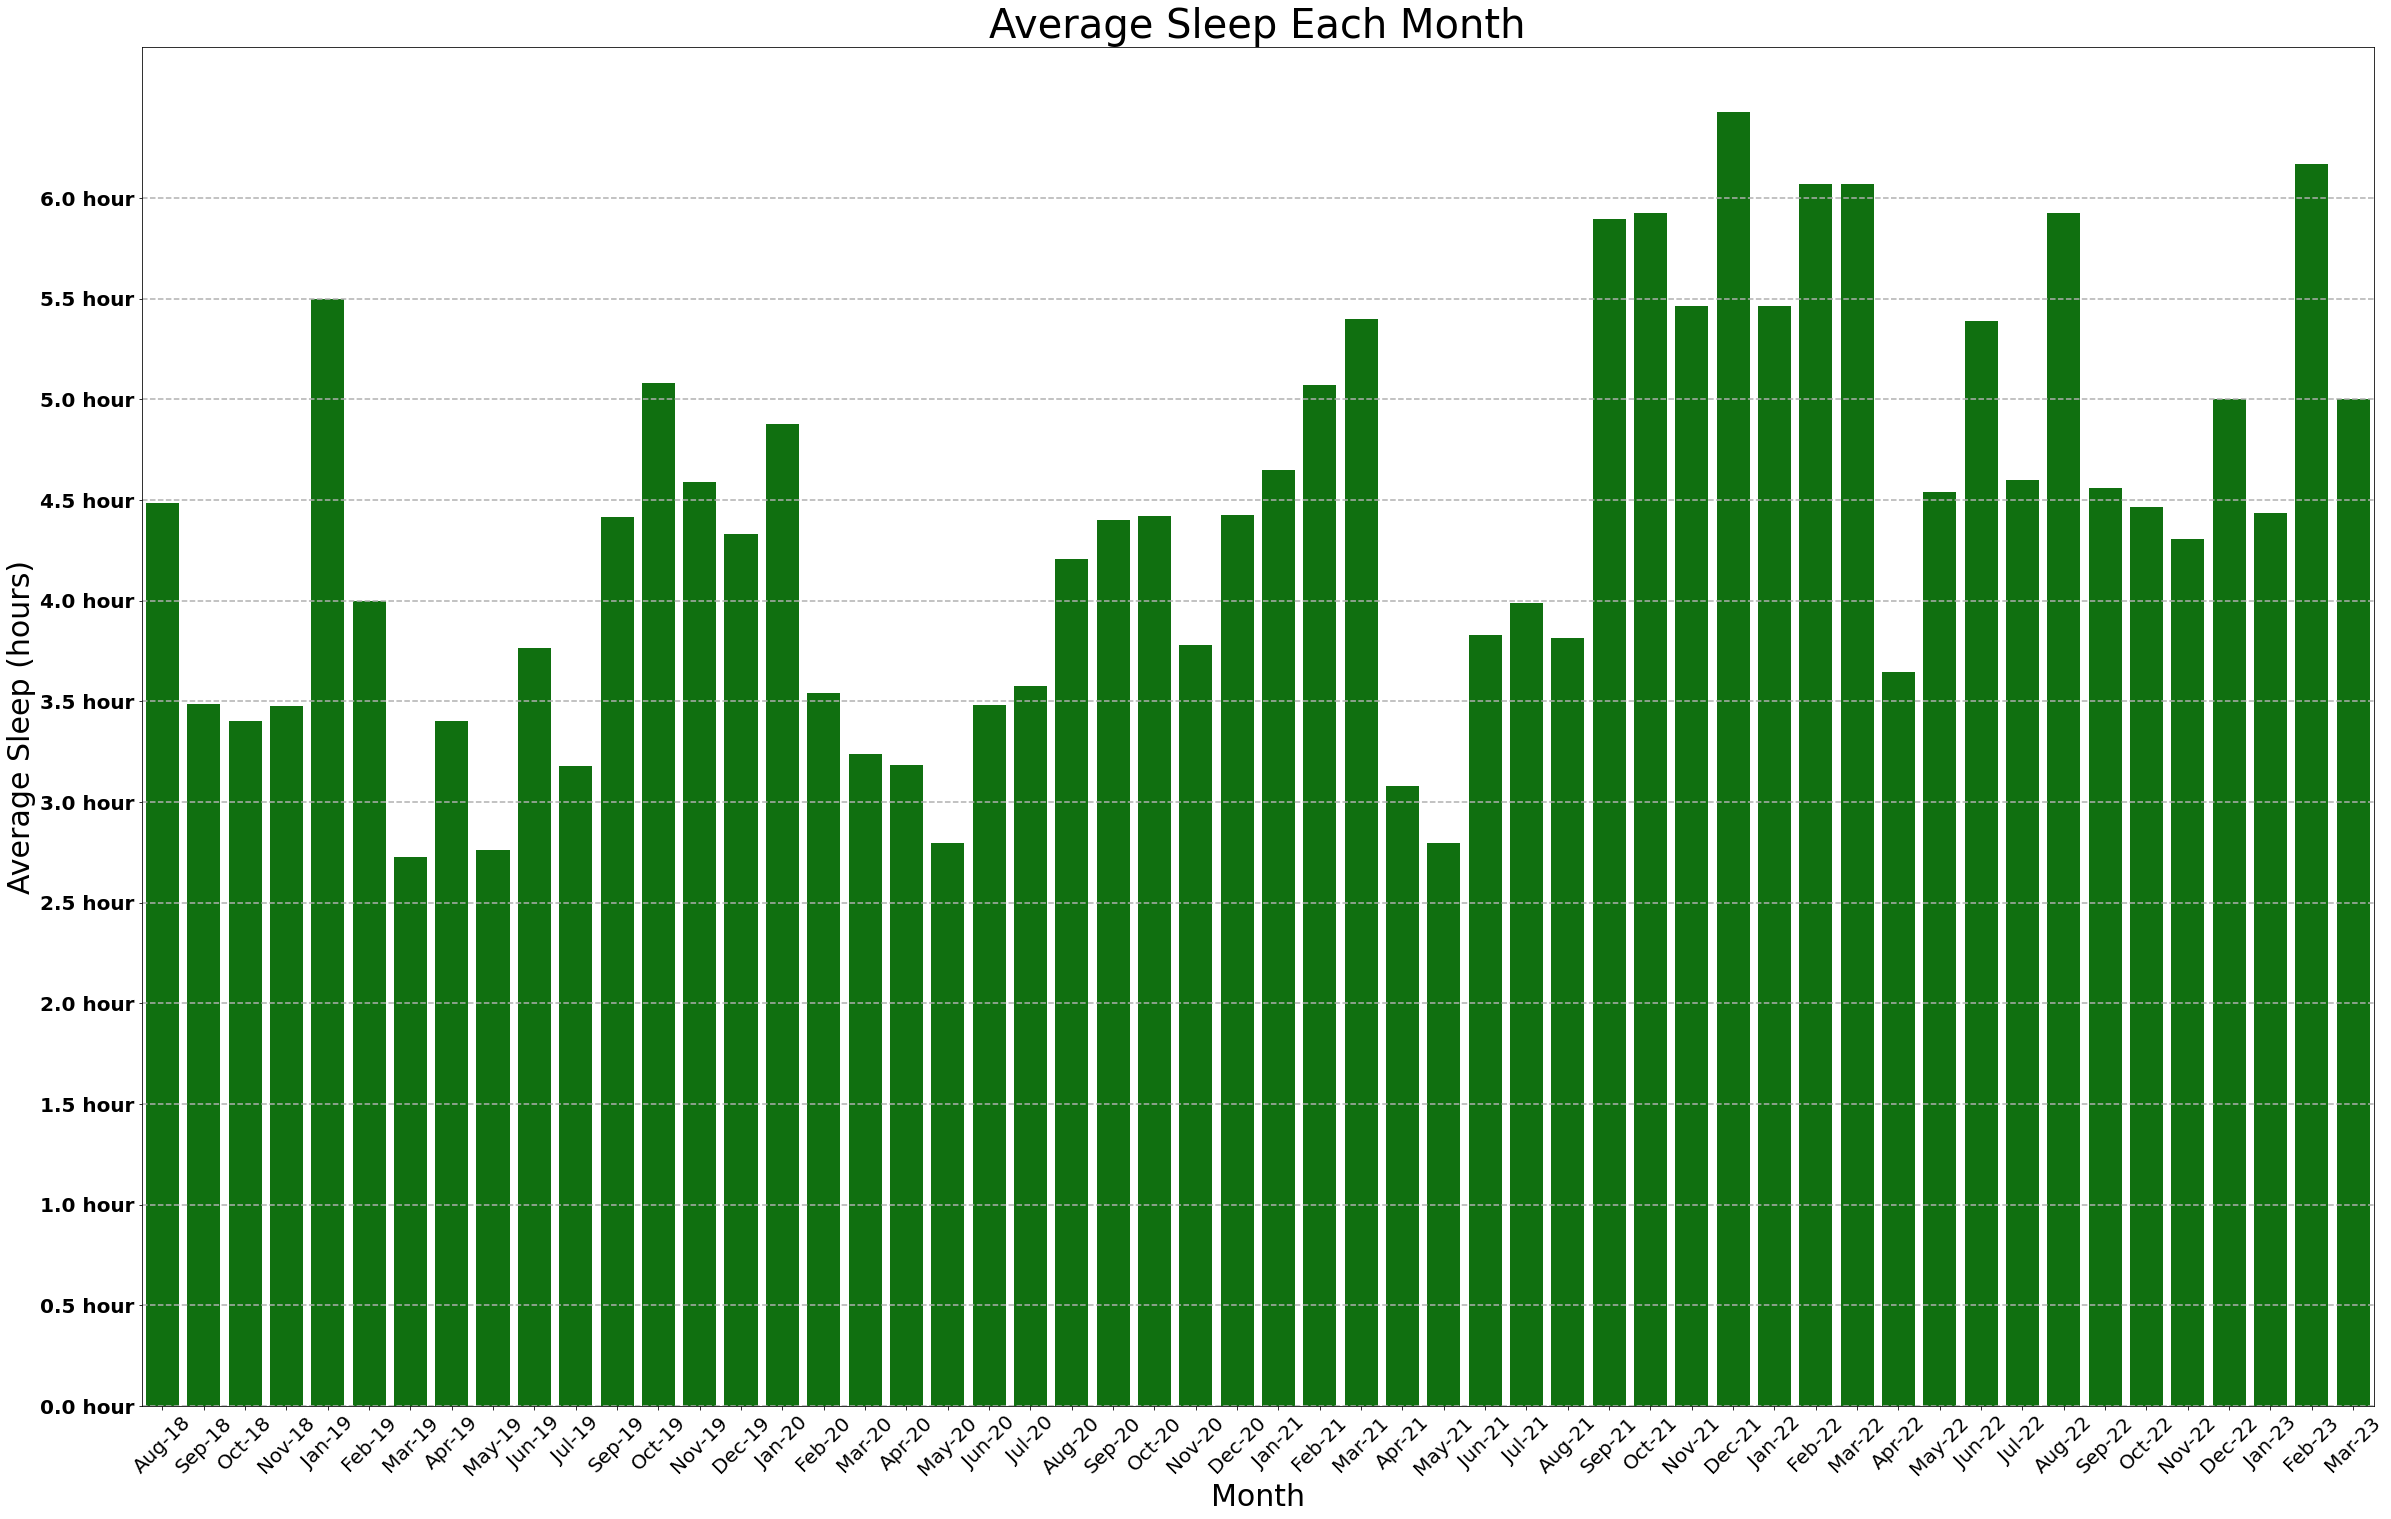

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'date' column is in datetime format
sleep['Day'] = sleep['date'].dt.to_period('D')  # Group by day

# Calculate total sleep time in minutes
sleep['total_sleep_minutes'] = sleep['hours'] * 60 + sleep['minutes']

# Calculate average sleep per day
average_sleep_per_day = sleep.groupby('Day')['total_sleep_minutes'].mean().reset_index()

# Convert 'Day' column to datetime
average_sleep_per_day['Day'] = average_sleep_per_day['Day'].dt.to_timestamp()

# Group by month and calculate average sleep per month
average_sleep_per_month = average_sleep_per_day.groupby(average_sleep_per_day['Day'].dt.to_period('M'))['total_sleep_minutes'].mean().reset_index()

# Convert total sleep time to hours for the y-axis
average_sleep_per_month['total_sleep_hours'] = average_sleep_per_month['total_sleep_minutes'] / 60

# Plotting with Seaborn
plt.figure(figsize=(40, 25))  # Increase figure size
ax = sns.barplot(x='Day', y='total_sleep_hours', data=average_sleep_per_month, color='green')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Adjust font sizes for better readability
plt.title('Average Sleep Each Month', fontsize=40)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Average Sleep (hours)', fontsize=30)

# Set y-axis ticks starting from 0.5 hours with bold font
ticks = [i / 2 for i in range(int(average_sleep_per_month['total_sleep_hours'].max()) * 2 + 1)]
tick_labels = [f'{i:.1f} hour' for i in ticks]
plt.yticks(ticks, tick_labels, fontsize=20, fontweight='bold')

# Customize grid lines (dashed lines)
plt.grid(axis='y', linestyle='--', linewidth=1.5)

# Format x-axis labels to mmm-yy
ax.set_xticklabels(average_sleep_per_month['Day'].dt.strftime('%b-%y'), fontsize=20)

# Save the plot as an image
#plt.savefig('average_sleep_each_month_large_green_agg.png', dpi=300)  # Increase DPI for a sharper image

# Show the plot
plt.show()


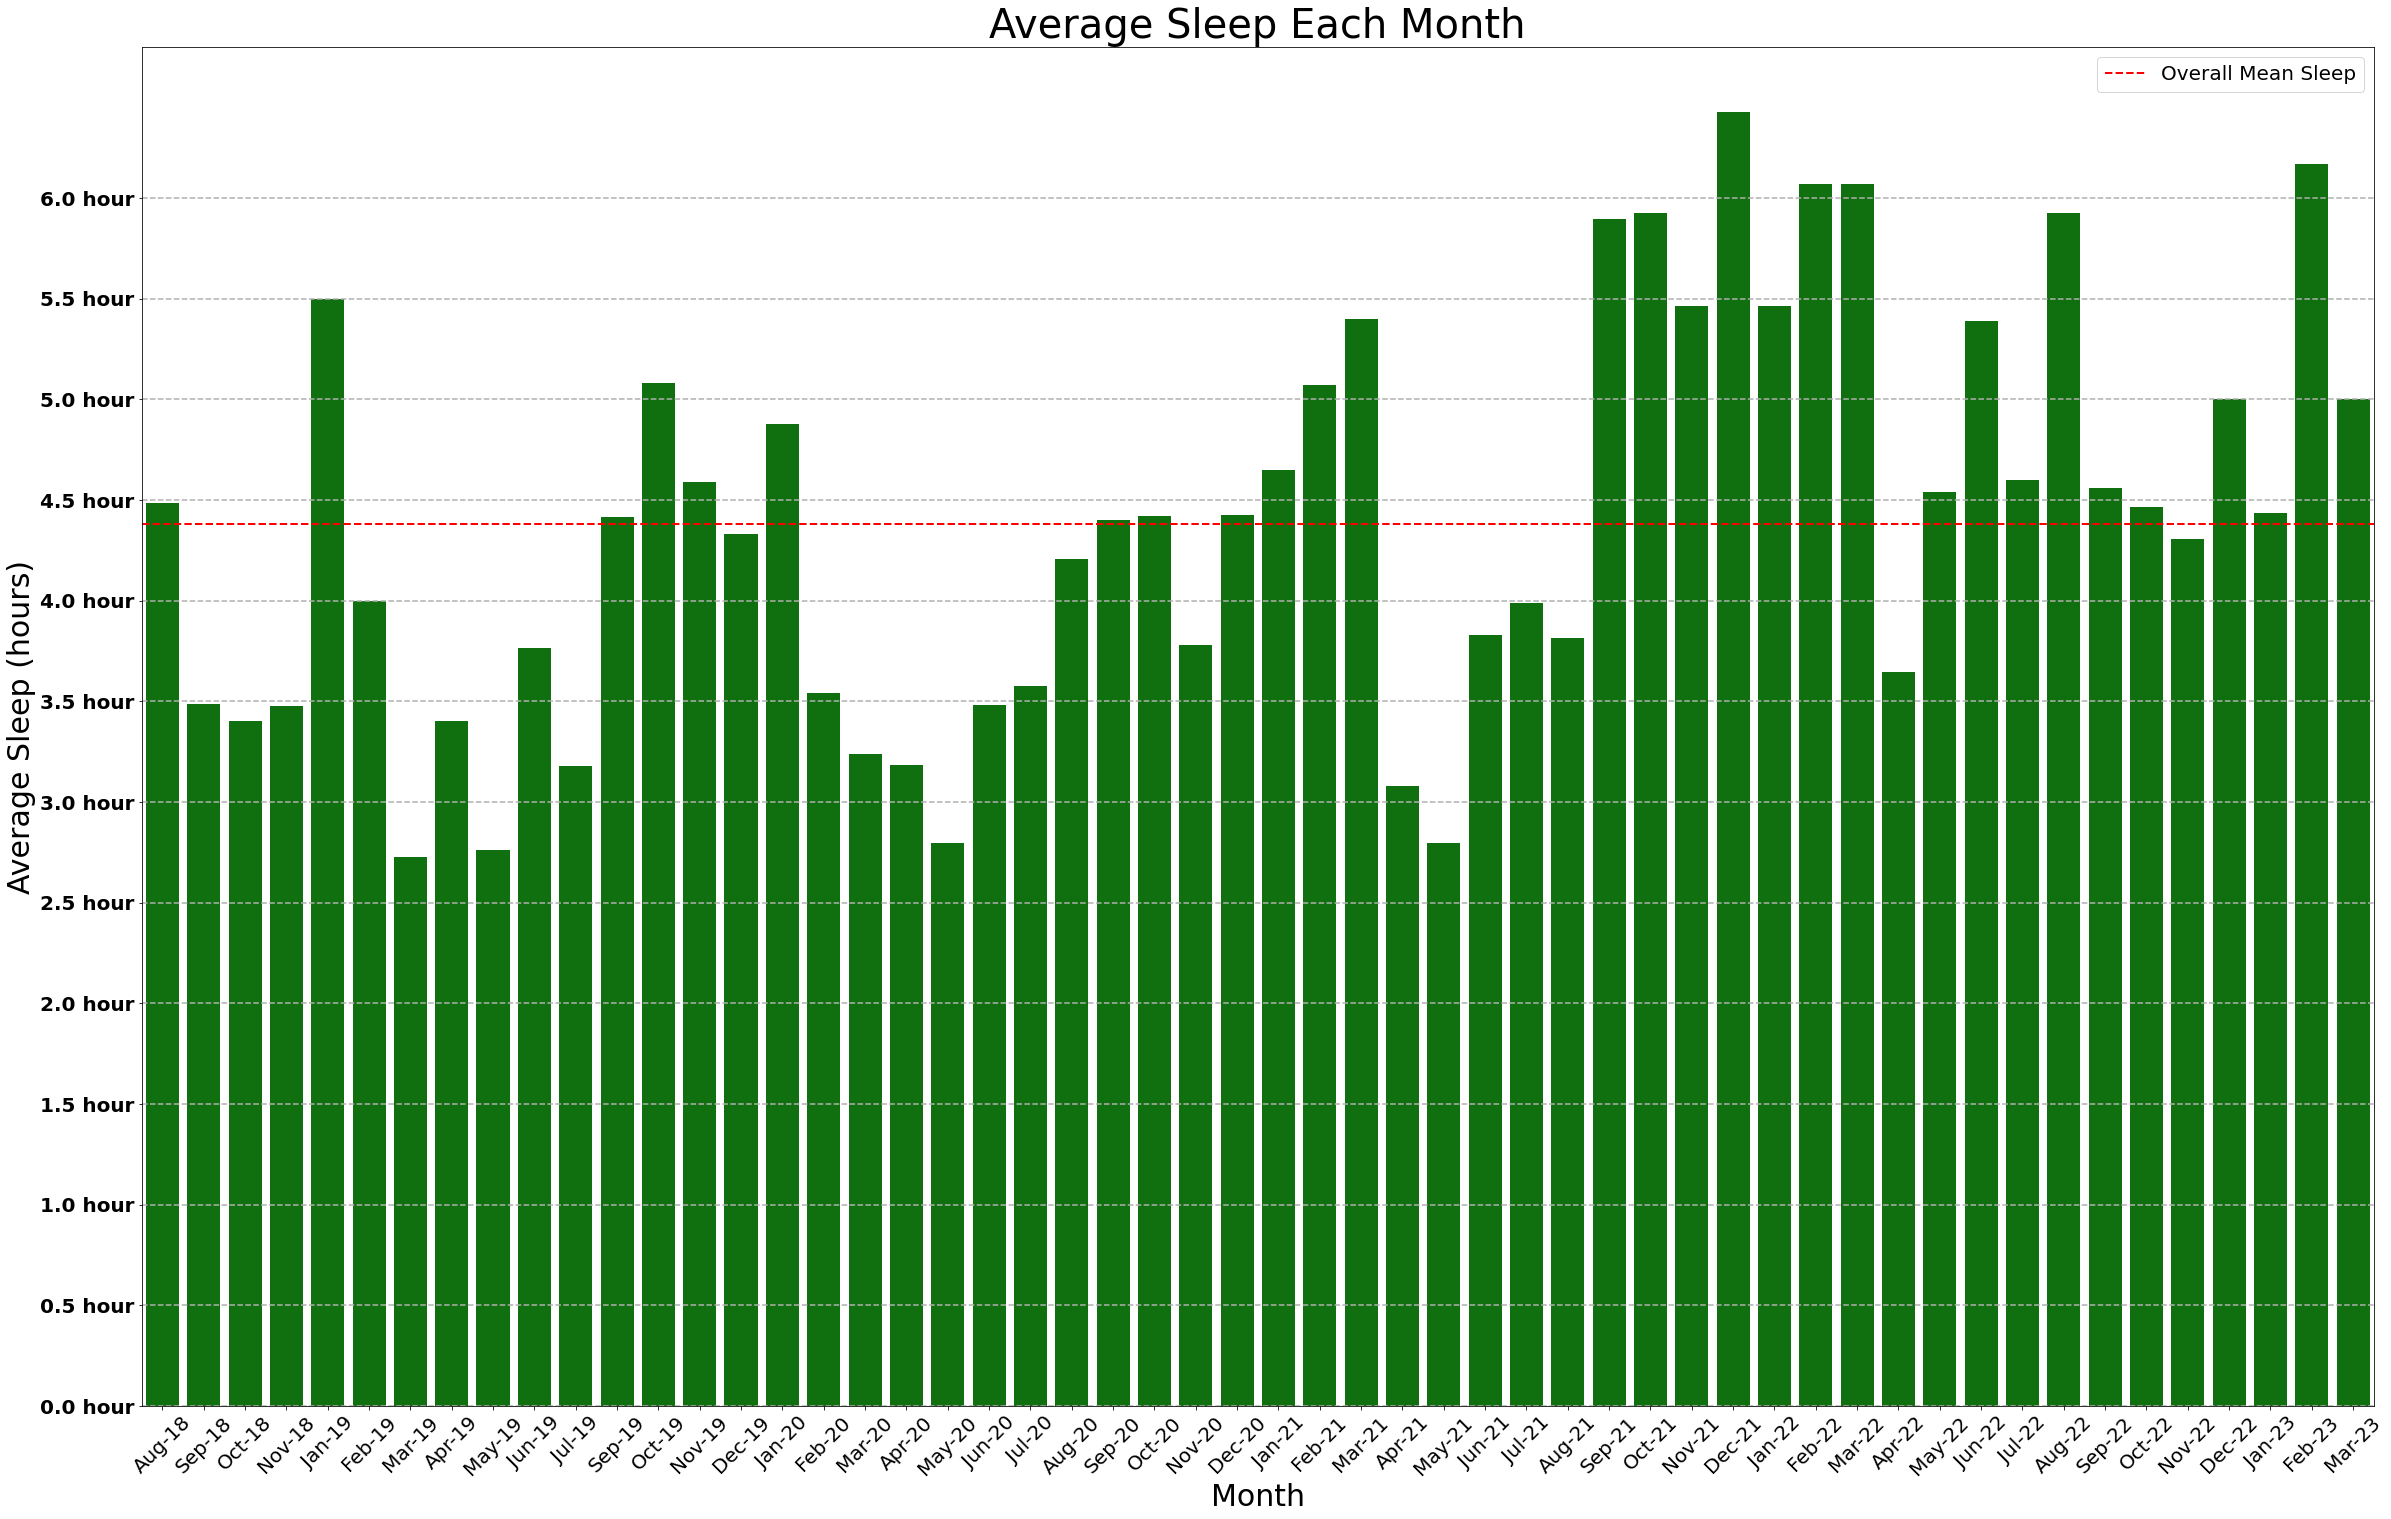

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'date' column is in datetime format
sleep['Day'] = sleep['date'].dt.to_period('D')  # Group by day

# Calculate total sleep time in minutes
sleep['total_sleep_minutes'] = sleep['hours'] * 60 + sleep['minutes']

# Calculate average sleep per day
average_sleep_per_day = sleep.groupby('Day')['total_sleep_minutes'].mean().reset_index()

# Convert 'Day' column to datetime
average_sleep_per_day['Day'] = average_sleep_per_day['Day'].dt.to_timestamp()

# Group by month and calculate average sleep per month
average_sleep_per_month = average_sleep_per_day.groupby(average_sleep_per_day['Day'].dt.to_period('M'))['total_sleep_minutes'].mean().reset_index()

# Convert total sleep time to hours for the y-axis
average_sleep_per_month['total_sleep_hours'] = average_sleep_per_month['total_sleep_minutes'] / 60

# Calculate overall mean sleep
overall_mean_sleep = average_sleep_per_month['total_sleep_hours'].mean()

# Plotting with Seaborn
plt.figure(figsize=(40, 25))  # Increase figure size
ax = sns.barplot(x='Day', y='total_sleep_hours', data=average_sleep_per_month, color='green')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Adjust font sizes for better readability
plt.title('Average Sleep Each Month', fontsize=40)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Average Sleep (hours)', fontsize=30)

# Set y-axis ticks starting from 0.5 hours with bold font
ticks = [i / 2 for i in range(int(average_sleep_per_month['total_sleep_hours'].max()) * 2 + 1)]
tick_labels = [f'{i:.1f} hour' for i in ticks]
plt.yticks(ticks, tick_labels, fontsize=20, fontweight='bold')

# Customize grid lines (dashed lines)
plt.grid(axis='y', linestyle='--', linewidth=1.5)

# Add a horizontal line for the overall mean sleep
plt.axhline(y=overall_mean_sleep, color='red', linestyle='--', linewidth=2, label='Overall Mean Sleep')

# Format x-axis labels to mmm-yy
ax.set_xticklabels(average_sleep_per_month['Day'].dt.strftime('%b-%y'), fontsize=20)

# Add a legend
plt.legend(fontsize=20)

# Save the plot as an image
plt.savefig('average_sleep_each_month_large_green_agg.png', dpi=300)  # Increase DPI for a sharper image

# Show the plot
plt.show()
